## Практическое задание к уроку № 4 по теме "Свёрточные нейронные сети".

**Задание 1.**

*Улучшите точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке.  
Приложите анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.*

На уроке, для экономии времени, мы обучали нейронную сеть только на одной  
эпохе. Получили при этом точность около 42%. Улучшим этот показатель.  
Сделаем необходимые импорты и возьмём основу кода нейронной сети с урока:

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
NUM_CLASSES = 10

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
RANDOM_STATE = 29

In [9]:
tf.random.set_seed(RANDOM_STATE)

BATCH_SIZE = 64
EPOCHS = 6

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.25, seed=RANDOM_STATE),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),
    Dropout(0.25, seed=RANDOM_STATE),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25, seed=RANDOM_STATE),
    Dense(NUM_CLASSES, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy: {score[1]*100:.1f} %')

Epoch 1/6
782/782 [==============================] - 56s 72ms/step - loss: 1.5035 - accuracy: 0.4578 - val_loss: 1.0948 - val_accuracy: 0.6184
Epoch 2/6
782/782 [==============================] - 58s 74ms/step - loss: 1.0350 - accuracy: 0.6370 - val_loss: 0.9245 - val_accuracy: 0.6785
Epoch 3/6
782/782 [==============================] - 56s 71ms/step - loss: 0.8609 - accuracy: 0.6944 - val_loss: 0.8168 - val_accuracy: 0.7167
Epoch 4/6
782/782 [==============================] - 56s 71ms/step - loss: 0.7484 - accuracy: 0.7355 - val_loss: 0.7809 - val_accuracy: 0.7259
Epoch 5/6
782/782 [==============================] - 56s 72ms/step - loss: 0.6668 - accuracy: 0.7643 - val_loss: 0.7328 - val_accuracy: 0.7431
Epoch 6/6
782/782 [==============================] - 56s 71ms/step - loss: 0.5957 - accuracy: 0.7874 - val_loss: 0.7302 - val_accuracy: 0.7526
Model accuracy: 75.3 %


Добились точности нейросети выше 75%. Для этого были внесены  
следующие изменения в настройки модели:  
- увеличение batch_size с 32 до 64;  
- увеличение числа эпох с 1 до 6;  
- добавление паддингов во все свёрточные слои;  
- удаление одного свёрточного слоя;  
- другие изменения параметров существующих слоёв;  
- изменение метода оптимизации с RMSprop на Adam.

Для визуальной демонстрации работы нейросети возмём две функции из  
урока № 3 и немного модифицируем их:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

In [10]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', \
               'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def plot_image(prediction_array, true_label, img):

    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)
    

In [14]:
def plot_value_array(prediction_array, true_label):

    plt.xticks(range(NUM_CLASSES), class_names, rotation=90)
    plt.yticks([])
    plot = plt.bar(range(NUM_CLASSES), prediction_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

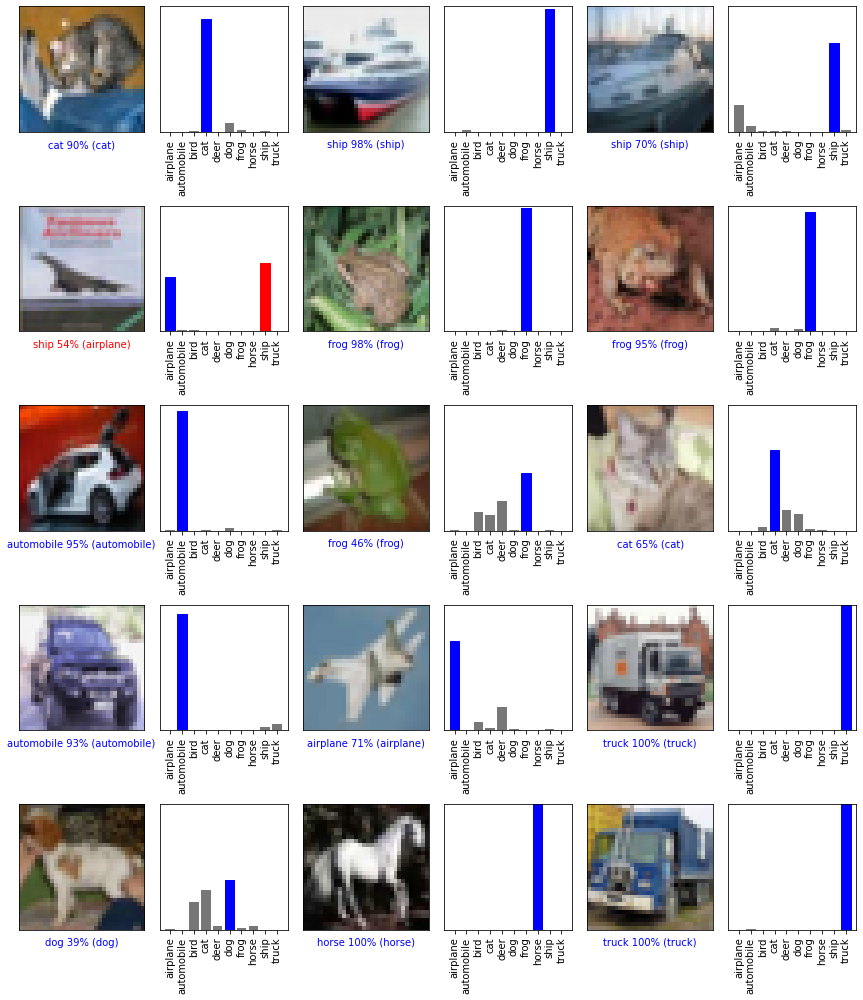

In [15]:
page_number = 1

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*1.4*num_rows))
for i in range(num_images):
    idx = i + (page_number-1) * num_images
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[idx], np.argmax(y_test[idx]), X_test[idx])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[idx], np.argmax(y_test[idx]))
    
plt.tight_layout()
plt.show()

<ins>Вывод:</ins>  
Настроили свёрточную нейронную сеть, рассмотренную на уроке.  
Сделали визуальное отображение работы нейросети.

**Задание 2.**

*Описать, какие необходимо внести изменения в получившуюся у вас нейронную сеть,  
если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.*

Для работы с датасетом MNIST нужно было бы добавить измерение датасетам с  
картинками, так как свёрточному слою необходимо указывать количество каналов во  
входном слое. Таким образом, нужно было бы в качестве 4-го измерения указать 1.  
Для датасета CIFAR100 нужно было бы изменить значение постоянной NUM_CLASSES на  
20 или 100, в зависимости от настроек импорта датасета.  
С датасетом IMAGENET пока ещё не работали.